# Glättung von Etiketten
In diesem Notebook werden wir zeigen, wie man die Umrisse von Etiketten durch Glättung verfeinern kann. Diese Operation ist verwandt mit der Erosion und Dilatation von Etiketten. Es ist jedoch nicht genau das, was eine Öffnung bewirkt. Es unterscheidet sich dadurch, dass keine Lücken zurückbleiben, sondern diese mit den nächstgelegenen Etiketten gefüllt werden.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

Ein möglicher Anwendungsfall ist die Feinabstimmung von Zellsegmentierungsergebnissen. Daher betrachten wir eine Segmentierung von Zellen basierend auf Membranen.

cl.OCLArray([[4496., 5212., 6863., ..., 2917., 2680., 2642.],
       [4533., 5146., 7555., ..., 2843., 2857., 2748.],
       [4640., 6082., 8452., ..., 3372., 3039., 3128.],
       ...,
       [1339., 1403., 1359., ..., 4458., 4314., 4795.],
       [1473., 1560., 1622., ..., 3967., 4531., 4204.],
       [1380., 1368., 1649., ..., 3091., 3558., 3682.]], dtype=float32)
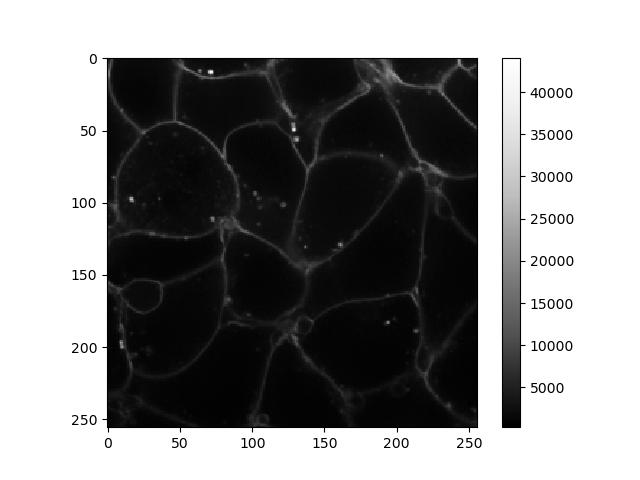
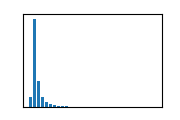

In [2]:
membranes = cle.imread("../../data/membranes.tif")
membranes


cl.OCLArray([[ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       ...,
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28],
       [26, 26, 26, ..., 28, 28, 28]], dtype=uint32)
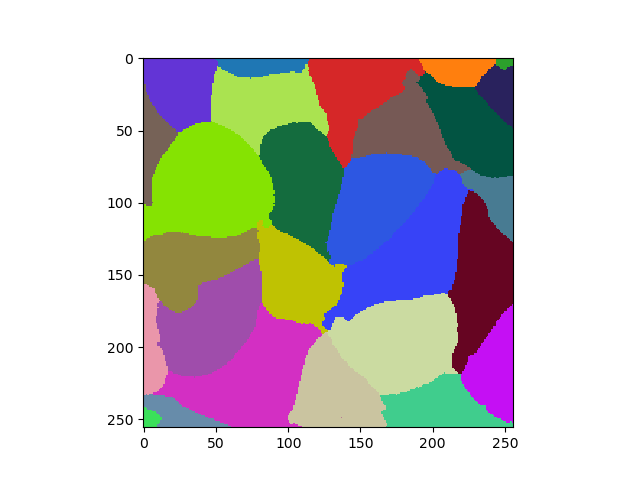

In [3]:
labels = cle.imread("../../data/membranes_labeled.tif").astype(np.uint32)
labels

Die Funktion `smooth_labels` ermöglicht es, die Umrisse der Etiketten zu begradigen.

cl.OCLArray([[ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       [ 5,  5,  5, ...,  3,  3,  3],
       ...,
       [25, 25, 25, ..., 22, 22, 22],
       [25, 25, 25, ..., 27, 22, 22],
       [25, 25, 25, ..., 27, 27, 22]], dtype=uint32)
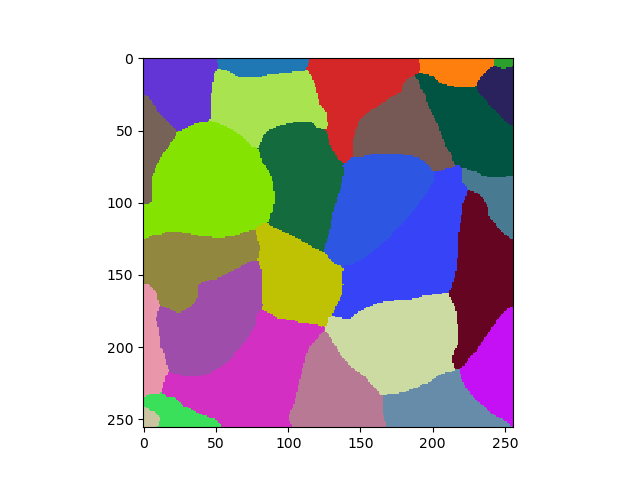

In [4]:
cle.smooth_labels(labels, radius=5)

Der folgende Codeblock ist eine modifizierte Version des Codes, der verwendet wurde, um das Video in [diesem Tweet](https://twitter.com/haesleinhuepf/status/1492215964305436673) zu erstellen, in dem wir den Namen des Filters diskutiert haben.

radius = 0


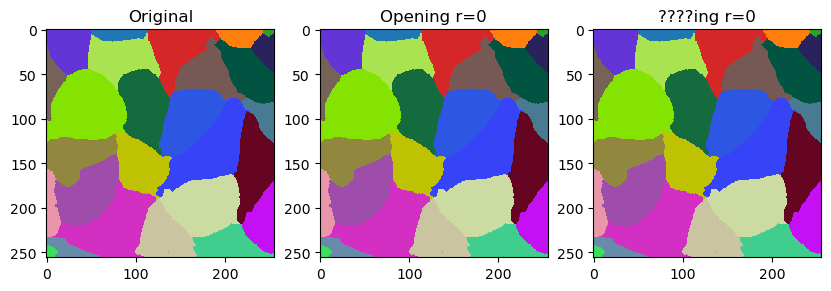

radius = 5


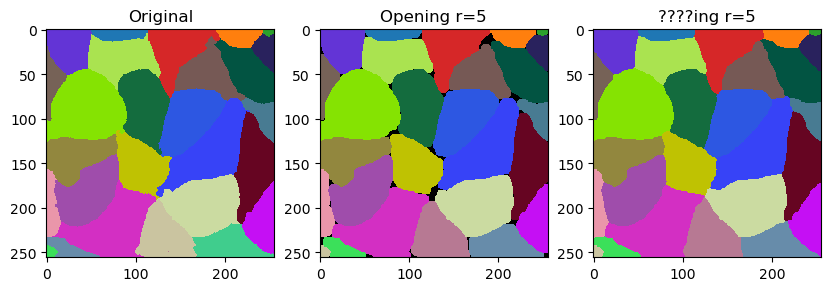

radius = 10


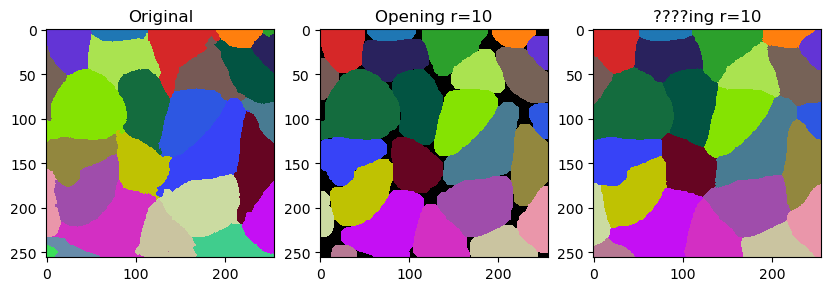

radius = 15


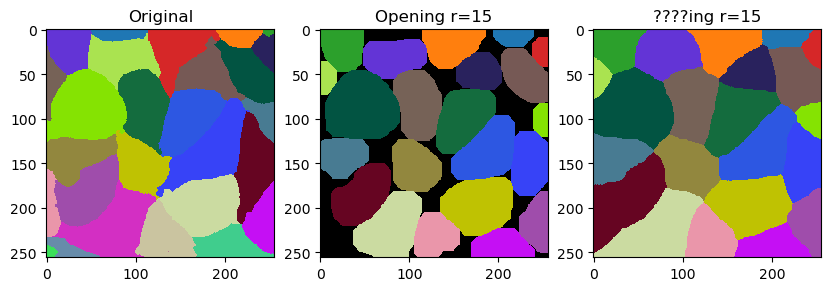

In [5]:
# for r in range(20):
for r in range(0, 20, 5):
    print("radius =", r)
    
    fig, ax = plt.subplots(1,3, figsize=(10,10))
    
    cle.imshow(labels, labels=True, plot=ax[0])
    cle.imshow(cle.opening_labels(labels, radius=r), labels=True, plot=ax[1])
    cle.imshow(cle.smooth_labels(labels, radius=r), labels=True, plot=ax[2])
    
    ax[0].set_title("Original")
    ax[1].set_title("Öffnung r=" + str(r))
    ax[2].set_title("????ing r=" + str(r))
    # plt.savefig("temp/" + str(r).zfill(2) + ".tif", dpi=300)
    plt.show()